In [1]:
from hw5_part2 import run_tests


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


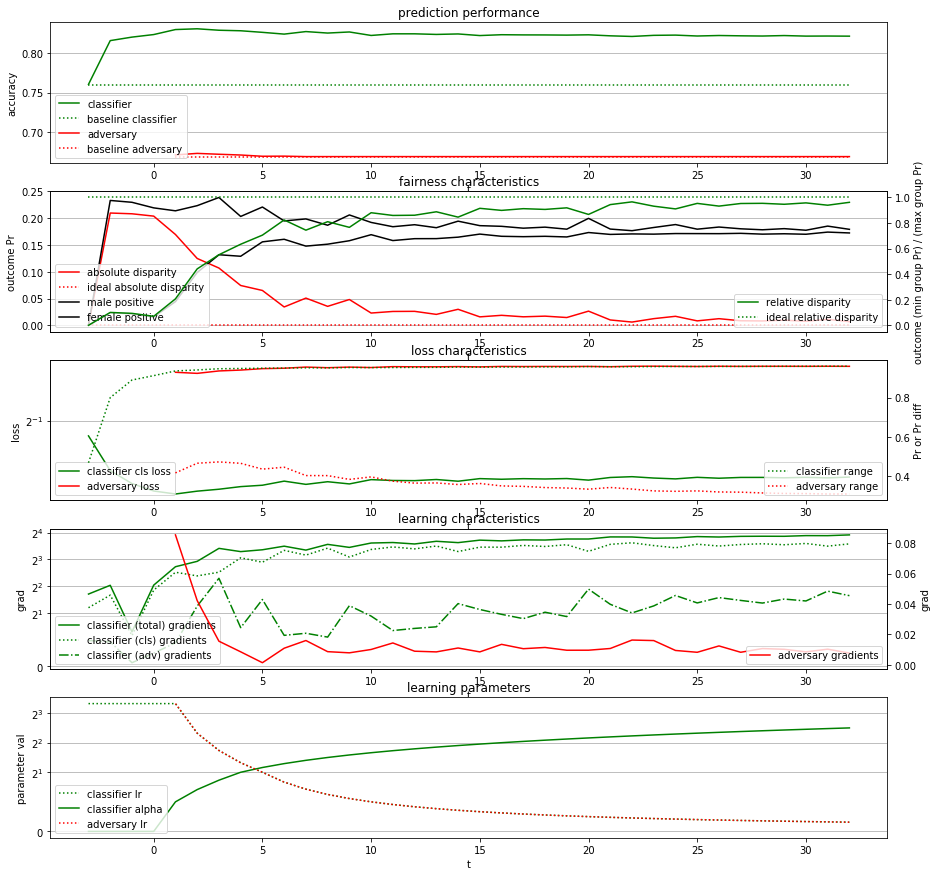

Demographic Parity
------------------

Accuracy: 0.8215 (baseline: 0.7600)

                    Group 0	Group 1
Demographic Parity: 0.1724	0.1792
Equal Opportunity:  0.7556	0.4511



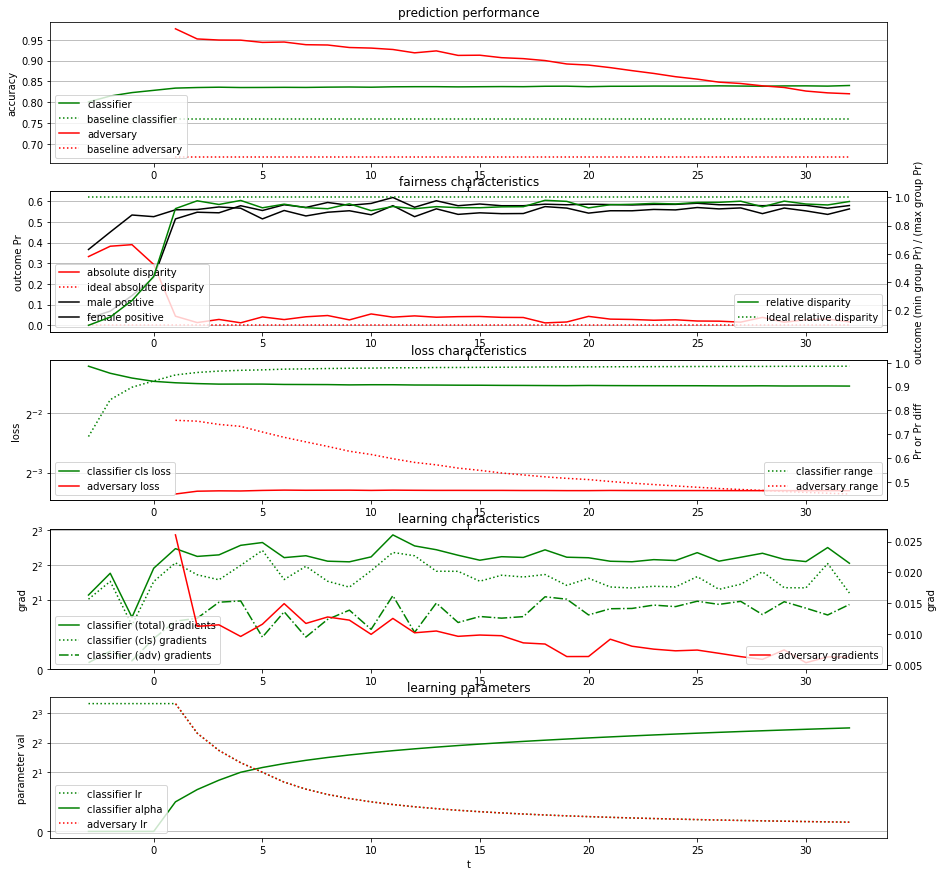

Equalized Opportunity
------------------

Accuracy: 0.8400 (baseline: 0.7600)

                    Group 0	Group 1
Demographic Parity: 0.0995	0.2370
Equal Opportunity:  0.5796	0.5632

Train on 30000 samples
Epoch 1/32
30000/30000 [==============================] - 3s 116us/sample - loss: 0.3874 - acc: 0.8120
Epoch 2/32
30000/30000 [==============================] - 3s 107us/sample - loss: 0.3487 - acc: 0.8347
Epoch 3/32
30000/30000 [==============================] - 3s 108us/sample - loss: 0.3425 - acc: 0.8397
Epoch 4/32
30000/30000 [==============================] - 3s 110us/sample - loss: 0.3382 - acc: 0.8395
Epoch 5/32
30000/30000 [==============================] - 3s 102us/sample - loss: 0.3344 - acc: 0.8412
Epoch 6/32
30000/30000 [==============================] - 3s 104us/sample - loss: 0.3310 - acc: 0.8439
Epoch 7/32
30000/30000 [==============================] - 3s 103us/sample - loss: 0.3292 - acc: 0.8453
Epoch 8/32
30000/30000 [==============================] - 3s 102us/sampl

In [2]:
run_tests(display_progress=True)

# Adult dataset

The rest of this notebook contains data pre-processing for the adult dataset.

In [2]:
import pandas as pd
from functools import partial

In [3]:
# adult.data can be retrieved from https://archive.ics.uci.edu/ml/datasets/adult
ad = pd.read_csv("adult.data", header=None, na_values=['?']).dropna(0)

In [5]:
objs = ad.select_dtypes(['object']).columns

ad_num = ad
#ad.apply(pd.to_numeric, errors='coerce')
#ad_num = pd.get_dummies(ad)
ad_num[objs] = ad[objs].apply(lambda x: x.astype('category').cat.codes)
objs = ad_num.select_dtypes(['category']).columns
ad_num[objs] = ad_num[objs].apply(pd.to_numeric)

In [6]:
ad_num.dtypes

0     int64
1      int8
2     int64
3      int8
4     int64
5      int8
6      int8
7      int8
8      int8
9      int8
10    int64
11    int64
12    int64
13     int8
14     int8
dtype: object

In [16]:
X = ad_num[set(ad_num.columns) - set([9,14])]._values
Xz = ad_num[set(ad_num.columns) - set([14])]._values
y = ad_num[14]._values
z = ad_num[9]._values

# for one hot encoding:
#X = ad_num[set(ad_num.columns) - set(["14_ <=50K", "14_ >50K", "9_ Female", "9_ Male"])]._values
#Xz = ad_num[set(ad_num.columns) - set(["14_ <=50K", "14_ >50K"])]._values
#y = ad_num["14_ >50K"]._values
#z = ad_num["9_ Male"]._values

y = y.reshape((y.shape[0], 1))
z = z.reshape((z.shape[0], 1))

In [9]:
np.savez("adult.npz", X=X, y=y, z=z)